# Sistem Elektromekanik
## DC Brushed Motor Torsi Besar dengan Motor Driver

Sistem yang akan dimodelkan berupa motor driver high current BTS7960 seperti gambar atas, dihubungkan dengan motor torsi besar dengan brush pada gambar bawah.
<div>
<img src="./1.jpg" style="width:20%" align="middle">
</div>
<div>
<img src="./2.jpg" style="width:20%" align="middle">
</div>
<p style="text-align:center"><b>Sumber gambar: KRTMI URO ITB</b></p>

## Input dan Output
Pada sistem, <b>input</b> adalah tegangan berupa sinyal $V_{in}$ 
<br>
dengan <b>output</b> posisi sudut $\theta$, kecepatan sudut motor $\omega$, dan torsi $T$ karena akan digunakan untuk manuver robot. Terlihat variable output bergantung pada $\theta$, $\frac {d\theta}{dt}$, dan $\frac{d^2\theta}{dt}$

## Motor Driver
Pertama ditinjau struktur sistem dari motor driver. Motor driver yang digunakan adalah tipe MOSFET BTS7960 sehingga memiliki karakteristik dinamik yang meningkat hampir dengan instant. MOSFET dirangkai sedemikian rupa sehingga dapat digunakan untuk kontrol maju/mundur motor. Diasumsikan rise-time MOSFET cukup cepat relatif terhadap sinyal dan motor driver cukup linear, maka motor driver dapat dimodelkan sebagai sistem orde 0 dengan gain sebesar $ K_{md} $. Input pada motor driver berupa sinyal dari mikrokontroller arduino sebesar 0-5V, keluaran maksimum dari motor driver adalah 24V $ V_s $, sehingga $ K_{md} = 4.8 $ 
<img src="./4.png" style="width:30%" align="middle">
<p style="text-align:center"><b>Sumber gambar: Datasheet BTS7960</b></p>
<img src="./5.png" style="width:30%" align="middle">
<p style="text-align:center"><b>Model Orde 0 Motor Driver</b></p>

Maka persamaan dinamik output terhadap input dalam motor driver adalah <br>
$ V_m=K_{md}V_{in} $<br>
$ V_m=4.8V_{in} $
<br>
Sama seperti hubungan input output pada karakteristik statik.

## Motor
Lalu ditinjau struktur sistem dari motor torsi besar dengan inertia beban yang tidak dapat diabaikan.
<img src="./3.png" style="width:30%" align="middle">
<p style="text-align:center"><b>Sumber gambar: https://www.researchgate.net/figure/The-structure-of-a-DC-motor_fig2_260272509</b></p>

Maka dapat diturunkan persamaan diferensial untuk sistem mekanik.
<br>
<img src="./6.png" style="width:30%">
<img src="./7.png" style="width:30%">
<p style="text-align:center"><b>Sumber gambar: Chapman - Electric Machinery Fundamentals 4th Edition</b></p>
<h2>$ T=K_a i_a $</h2> dengan $T$ adalah torsi dan $K_a$ adalah konstanta proporsionalitas torsi (hasil perkalian K dengan flux) untuk arus armature $i_a$
<br>
<h2>$ V_{emf}=K_{emf} \omega$</h2>dengan $V_{emf}$ adalah tegangan penyebab electromotive force dan $K_{emf}$ konstanta proporsionalitas tegangan emf (hasil perkalian K dengan flux pada kondisi ideal tanpa voltage drop) untuk kecepatan putar sudut dari motor.
<br>
<br>
Namun, akibat terbentuknya torsi adalah berputarnya beban dengan kecepatan sudut sebesar $\omega$ dan percepatan sudut sebesar $\alpha$. Faktor proporsionalitas terhadap percepatan sudut adalah $J$ (Inersia Putar) dan terhadap kecepatan sudut sebesar $ K_f $ (Konstanta Redam Putar) Sehingga dapat diturunkan persamaan diferensial sebagai berikut:
<br>
<h2>$ J\alpha + K_f\omega = T $</h2>
<h2>$ J\frac {d^2\theta}{dt} + K_f\frac {d\theta}{dt} = K_a i_a $</h2>

Kemudian diturunkan persamaan diferensial untuk sistem elektrik yang terdapat pada motor sehingga $i_a$ dapat disubstitusi dengan input $V_{in}$.
<br>
<h2>$ L \frac{d{i_a}}{dt} + R i_a + K_a i_a = V_m $</h2>
dimana $V_m = 4.8 V_{in}$ sehingga
<h2>$ L \frac{d{i_a}}{dt} + (R + K_a) i_a = 4.8 V_{in} $</h2>

## Fungsi Transfer
Dilakukan penyelesaian menggunakan fungsi transfer dalam domain laplace, pertama dilakukan transfer ke domain laplace dengan asumsi
<br>
$ i_a (0) = 0 $
<br>
$ \frac {di_a}{dt} = 0 $
<br>
$ \theta (0) = 0 $
<br>
$ \omega (0) = 0 $
<br>
$ \alpha (0) = 0 $

Maka persamaan pertama:
<br>
<h2>$ \omega = \frac {K_a i_a}{(J s + K_f)} $</h2>
<br>
Maka persamaan kedua:
<br>
<h2>$  i_a = \frac {4.8 V_{in}}{(L s + R + K_a)} $</h2>

Sehingga persamaan gabungan untuk fungsi transfer sistem untuk output $ \omega $ adalah:
<br>
<h2>$\omega = \frac {4.8 K_a  V_{in}}{(J s + K_f)(L s + R + K_a)}$</h2>

dengan $ T = J \alpha $ dan $ \alpha = s \omega$ maka
<br>
<h2>$ T = \frac {4.8 J K_a  V_{in} s}{(J s + K_f)(L s + R + K_a)} $ </h2>

Lalu untuk posisi $\theta$ adalah
<br>
$ \omega = \frac {d\theta}{dt} $
<br>
Maka $\theta = \frac {\omega}{s}$
<br>
<h2>$\theta = \frac {4.8 K_a  V_{in}}{s(J s + K_f)(L s + R + K_a)}$</h2>

In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy.signal as sig
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, SymbolicSystem
from sympy import *

In [2]:
omega = dynamicsymbols('omega theta')

In [3]:
syms = symbols ('K_f V_{in} J L R K_a s T')

In [4]:
kf,vin,j,l,r,ka,s,T = syms

In [5]:
omega = (4.8*ka*vin)/((j*s+kf)*(l*s+r+ka))

In [6]:
T = (4.8*ka*vin*j*s)/((j*s+kf)*(l*s+r+ka))

In [7]:
theta = (4.8*ka*vin)/(s*(j*s+kf)*(l*s+r+ka))

In [8]:
#Penjabaran menggunakan sympy
polyOmega=omega.as_poly()
polyOmega

Poly(4.8*(1/(J*K_a*s + J*L*s**2 + J*R*s + K_a*K_f + K_f*L*s + K_f*R))*K_a*V_{in}, 1/(J*K_a*s + J*L*s**2 + J*R*s + K_a*K_f + K_f*L*s + K_f*R), K_a, V_{in}, domain='RR')

In [9]:
polyT=T.as_poly()
polyT

Poly(4.8*s*(1/(J*K_a*s + J*L*s**2 + J*R*s + K_a*K_f + K_f*L*s + K_f*R))*J*K_a*V_{in}, s, 1/(J*K_a*s + J*L*s**2 + J*R*s + K_a*K_f + K_f*L*s + K_f*R), J, K_a, V_{in}, domain='RR')

In [10]:
polyTheta=theta.as_poly()
polyTheta

Poly(4.8*(1/(J*K_a*s**2 + J*L*s**3 + J*R*s**2 + K_a*K_f*s + K_f*L*s**2 + K_f*R*s))*K_a*V_{in}, 1/(J*K_a*s**2 + J*L*s**3 + J*R*s**2 + K_a*K_f*s + K_f*L*s**2 + K_f*R*s), K_a, V_{in}, domain='RR')

In [11]:
tf = sig.TransferFunction

In [12]:
kf=100
j=100
l=10
r=1
ka=100

In [13]:
tf_Omega_Vin = tf([4.8*ka],[j*l,(j*ka+j*r+kf*l),(ka*kf+kf*r)])
tf_Omega_Vin

TransferFunctionContinuous(
array([0.48]),
array([ 1. , 11.1, 10.1]),
dt: None
)

In [14]:
tf_T_Vin = tf([4.8*j*ka],[j*l,(j*ka+j*r+kf*l),(ka*kf+kf*r)])
tf_T_Vin

TransferFunctionContinuous(
array([48.]),
array([ 1. , 11.1, 10.1]),
dt: None
)

In [15]:
tf_Theta_Vin = tf([4.8*ka],[j*l,(j*ka+j*r+kf*l),(kf*r+ka*kf),0])
tf_Theta_Vin

TransferFunctionContinuous(
array([0.48]),
array([ 1. , 11.1, 10.1,  0. ]),
dt: None
)

In [16]:
resultx,resulty=sig.step(tf_Omega_Vin)

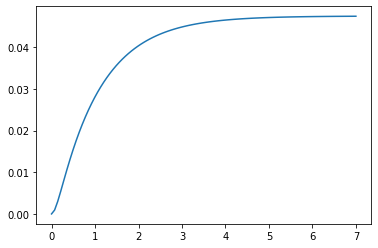

In [17]:
plt.plot(resultx,resulty)

In [18]:
resultx,resulty=sig.step(tf_Theta_Vin)

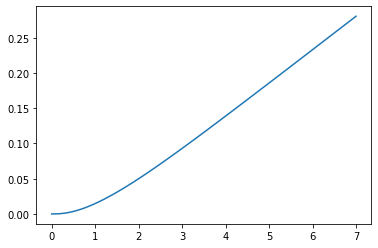

In [19]:
plt.plot(resultx,resulty)

In [20]:
resultx,resulty=sig.step(tf_T_Vin)

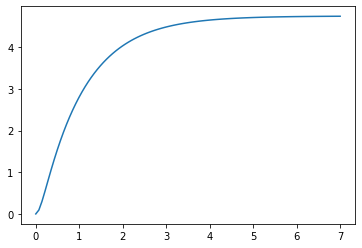

In [21]:
plt.plot(resultx,resulty)